In [41]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setup plotting style
sns.set(style='whitegrid')
%matplotlib inline


In [1]:
import pandas as pd

# Load all cleaned version of CSVs
df_fact = pd.read_csv("cleaned_fact.csv", low_memory=False)
df_customers = pd.read_csv("cleaned_customer.csv")
df_items = pd.read_csv("cleaned_item.csv")
df_stores = pd.read_csv("store_dim.csv")
df_time = pd.read_csv("cleaned_time.csv")
df_trans = pd.read_csv("cleaned_trans.csv")


In [6]:
# Merge all tables into one
df = df_fact.merge(df_customers, on='customer_key', how='left') \
         .merge(df_items, on='item_key', how='left') \
         .merge(df_stores, on='store_key', how='left') \
         .merge(df_time, on='time_key', how='left') \
         .merge(df_trans, on='payment_key', how='left')


In [9]:
df.head()

,payment_key,customer_key,time_key,item_key,store_key,quantity,unit_x,unit_price_x,total_price,cleaned_name,...,upazila,date,hour,day,week,month_name,quarter,year,trans_type,bank_name
0,P026,C004510,T049189,I00177,S00307,1,cans,35.0,35.0,priya,...,ISLAMPUR,2016-04-26 17:13:00,17,26,4th Week,April,Q2,2016,card,Premier Bank Limited
1,P022,C008967,T041209,I00248,S00595,1,cans,26.0,26.0,harpreet kaur,...,CANTONMENT,2018-06-11 19:08:00,19,11,2nd Week,June,Q2,2018,card,NRB Commercial Bank Ltd
2,P030,C007261,T03633,I00195,S00496,8,cans,12.5,100.0,sonam,...,BEGUMGANJ,2016-11-19 08:19:00,8,19,3rd Week,November,Q4,2016,card,Shimanto Bank Ltd
3,P032,C007048,T084631,I00131,S0086,8,cans,14.0,112.0,rekha bai,...,KAUNIA,2020-02-01 06:00:00,6,1,1st Week,February,Q1,2020,card,South Bangla Agriculture and Commerce Bank Lim...
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,mamta devi,...,MATIRANGA,2014-07-15 02:58:00,2,15,3rd Week,July,Q3,2014,card,Meghna Bank Limited


### Key Performance Metrics (KPI)

In [10]:
# Total revenue

In [14]:
total_sales = df['total_price'].sum()
print (total_sales)

105401435.75


In [15]:
# Average order value (aov)

In [16]:
aov = df.groupby('customer_key')['total_price'].sum().mean()
print(aov)

11467.896393210749


In [17]:
# top selling product


In [19]:
top_items = df.groupby('item_name_cleaned')['quantity'].sum().sort_values(ascending=False).head(10)
print(top_items)

item_name_cleaned
foam coffee cups                  91312
red bull                          69651
pepsi cans                        46837
clear plastic cups                45756
muscle milk protein shake van.    45665
coke classic cans                 45501
gatorade frost variety            45218
diet coke cans                    45202
sprite cans                       45140
gatorade liberty variety          44519
Name: quantity, dtype: int64


### Analysis of Influencing Factors

In [21]:
#impact of payment methods

In [25]:
payment_analysis = df.groupby('trans_type')['total_price'].sum().sort_values(ascending=False)
print (payment_analysis)

trans_type
card      94583038.50
mobile     8109881.50
cash       2708515.75
Name: total_price, dtype: float64


In [26]:
# customer location vs sales

In [27]:
location_sales = df.groupby(['division', 'district'])['total_price'].sum().sort_values(ascending=False)
print(location_revenue)

division    district  
DHAKA       DHAKA         23597621.00
CHITTAGONG  CHITTAGONG     7292985.50
KHULNA      KHULNA         4081283.75
RAJSHAHI    RAJSHAHI       3756454.50
BARISAL     BARISAL        2897237.75
                             ...     
KHULNA      MAGURA          577543.25
BARISAL     JHALOKATI       570807.25
KHULNA      CHUADANGA       563909.75
            NARAIL          440698.75
            MEHERPUR        436755.00
Name: total_price, Length: 64, dtype: float64


In [29]:
# product category vs supplier impact
supplier_perf = df.groupby('supplier')['total_price'].sum().sort_values(ascending=False)
print(supplier_perf)

supplier
Denimach Ltd                      13337300.50
Indo Count Industries Ltd         13159323.25
Bigso Ab                          11746920.00
Chromadurlin S.A.S                10976287.50
Friedola 1888 Gmbh                10957102.25
Bolsius Boxmeer                   10458204.00
Maesa Sas                          9892983.50
Ningbo Seduno Imp & Exp Co.Ltd     9463861.50
Hardford Ab                        9416792.25
Cherry Group Co.,Ltd               5992661.00
Name: total_price, dtype: float64


### Trend and Pattern Analysis

In [30]:
#monthly sales trend

In [32]:
monthly_sales = df.groupby('month_name')['total_price'].sum().sort_values()
print(monthly_sales)

month_name
February     8073877.50
April        8504634.75
June         8556853.00
November     8680026.00
September    8724326.50
October      8902783.75
December     8923480.50
August       8929475.25
March        8939152.00
January      9042244.00
July         9046580.00
May          9078002.50
Name: total_price, dtype: float64


In [33]:
#peak sales time (by hour or day)


In [38]:
hourly_sales = df.groupby('hour')['total_price'].sum()
daily_sales = df.groupby('day')['total_price'].sum()
print('Hourly sales : ',hourly_sales)

Hourly sales :  hour
0     4293368.00
1     4313828.00
2     4402569.25
3     4379149.75
4     4278390.25
5     4404697.75
6     4258067.00
7     4397288.75
8     4315875.25
9     4472149.75
10    4459400.50
11    4290583.25
12    4427233.25
13    4475946.00
14    4576237.50
15    4409550.25
16    4346857.75
17    4497724.50
18    4371271.50
19    4548869.00
20    4309155.00
21    4448638.50
22    4317362.75
23    4407222.25
Name: total_price, dtype: float64


In [39]:
print('daily sales : ',daily_sales)

daily sales :  day
1     3496325.00
2     3345887.50
3     3454087.00
4     3569375.00
5     3412553.50
6     3384187.75
7     3464204.50
8     3432409.75
9     3417391.00
10    3403045.25
11    3380680.50
12    3532739.75
13    3420067.00
14    3499562.50
15    3547880.25
16    3482417.25
17    3405857.00
18    3429398.00
19    3462293.75
20    3451589.00
21    3447109.25
22    3595900.25
23    3455380.00
24    3531390.50
25    3462847.00
26    3552391.75
27    3404054.50
28    3415162.25
29    3317730.75
30    3183229.75
31    2044288.50
Name: total_price, dtype: float64


### visualisations

In [42]:
# sales by payment method

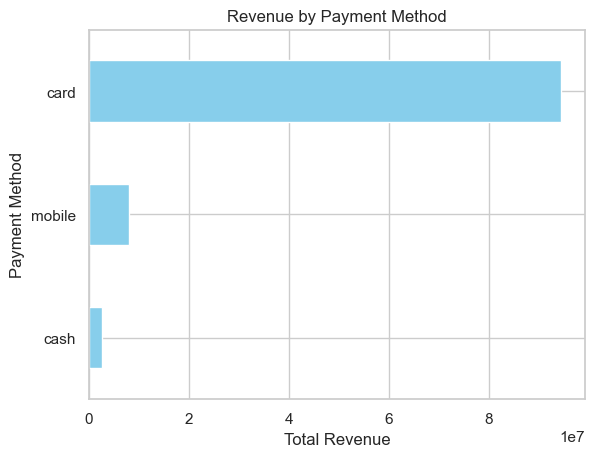

In [43]:
payment_rev = df.groupby('trans_type')['total_price'].sum().sort_values()
payment_rev.plot(kind='barh', color='skyblue', title='Revenue by Payment Method')
plt.xlabel("Total sales")
plt.ylabel("Payment Method")
plt.show()


In [52]:
#sale by year

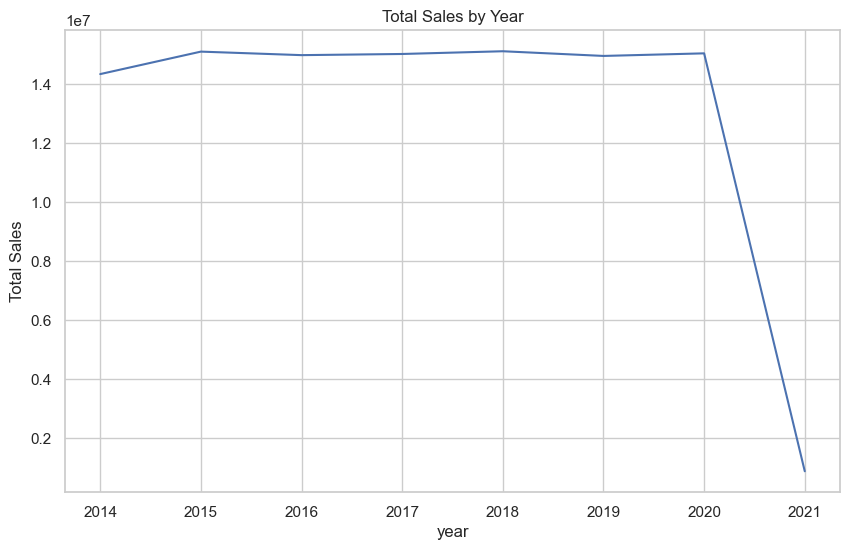

In [53]:
# Total Sales by Year
df.groupby('year')['total_price'].sum().plot(kind='line', figsize=(10, 6), title='Total Sales by Year')
plt.ylabel('Total Sales')
plt.show()



In [51]:
# sale by month

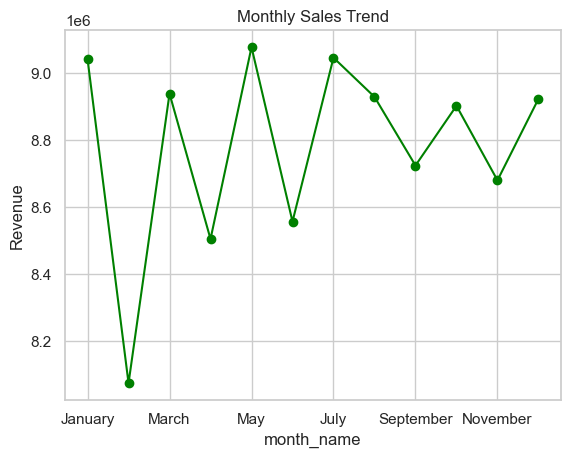

In [45]:
monthly = df.groupby('month_name')['total_price'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

monthly.plot(kind='line', marker='o', color='green', title='Monthly Sales Trend')
plt.ylabel("Revenue")
plt.show()


In [46]:
#sales by region

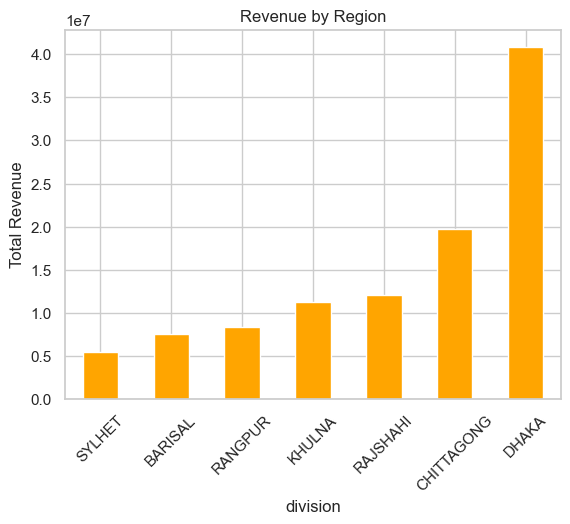

In [47]:
region_rev = df.groupby('division')['total_price'].sum().sort_values()
region_rev.plot(kind='bar', color='orange', title='Revenue by Region')
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


In [48]:
# hourly sales trend

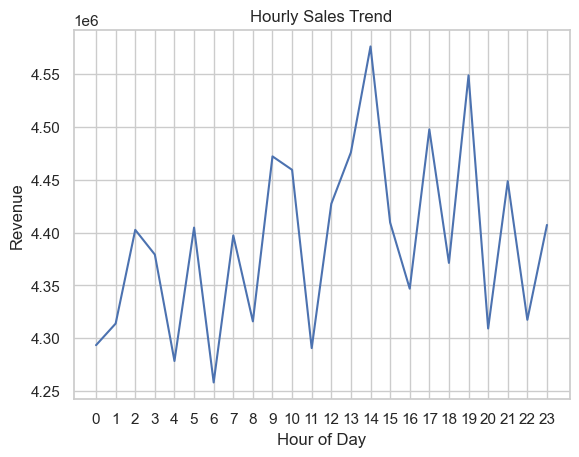

In [49]:
hourly_sales = df.groupby('hour')['total_price'].sum()
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title("Hourly Sales Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.xticks(range(0, 24))
plt.show()


In [54]:
#Sales by Item
#Which products bring in the most revenue?

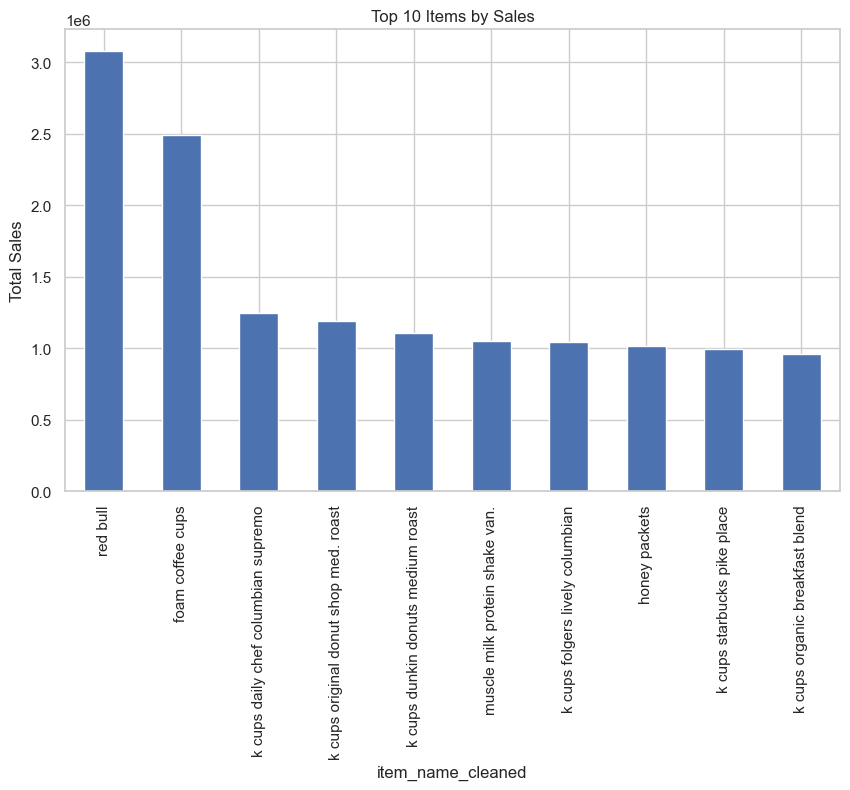

In [59]:
top_items = df.groupby('item_name_cleaned')['total_price'].sum().sort_values(ascending=False).head(10)
top_items.plot(kind='bar', figsize=(10, 6), title='Top 10 Items by Sales')
plt.ylabel('Total Sales')
plt.show()


In [61]:
# top moving product


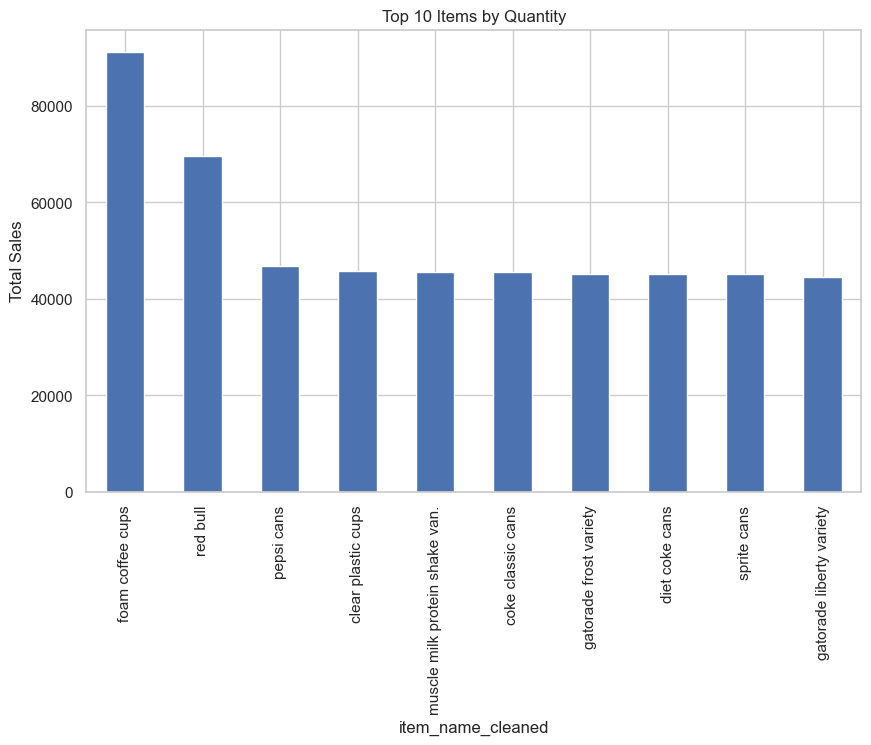

In [63]:
top_items = df.groupby('item_name_cleaned')['quantity'].sum().sort_values(ascending=False).head(10)
top_items.plot(kind='bar', figsize=(10, 6), title='Top 10 Items by Quantity')
plt.ylabel('Total Sales')
plt.show()


In [80]:
# sales by store

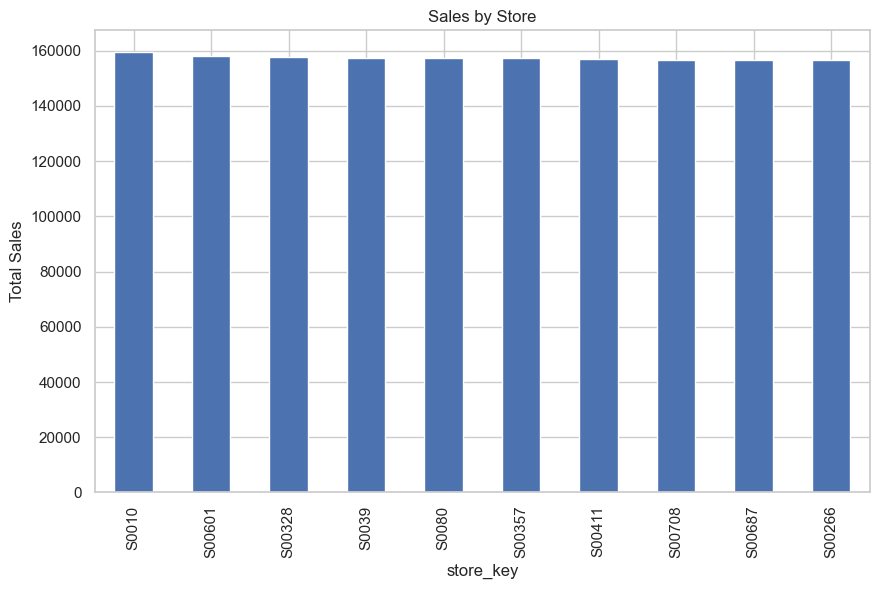

In [64]:
df.groupby('store_key')['total_price'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6), title='Sales by Store')
plt.ylabel('Total Sales')
plt.show()


In [65]:
# Transaction Type Analysis
#Find the distribution of transaction types.

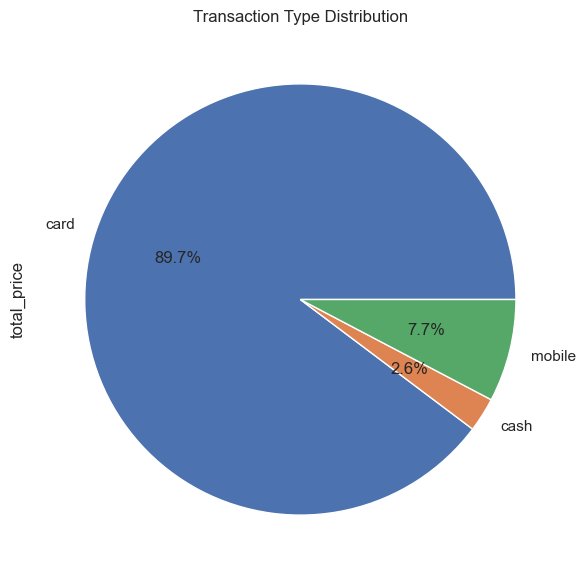

In [66]:
df.groupby('trans_type')['total_price'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), title='Transaction Type Distribution')
plt.show()


In [77]:
# top customers

In [76]:


# Group by customer and calculate total sales
top_customers = df.groupby("cleaned_name")["total_price"].sum().reset_index()

# Sort the customers by total sales in descending order
top_customers = top_customers.sort_values(by="total_price", ascending=False)

# Show the top 10 customers
top_10_customers = top_customers.head(10)

# Display result
print(top_10_customers)


     cleaned_name  total_price
2516        pooja   2109800.75
1200        jyoti   1331696.25
2266         neha    996121.00
4151       sunita    915543.75
2555       poonam    914285.25
2658     priyanka    819243.25
3440        seema    813087.75
4105        suman    748327.25
1461        komal    698672.75
2341        nisha    696139.25


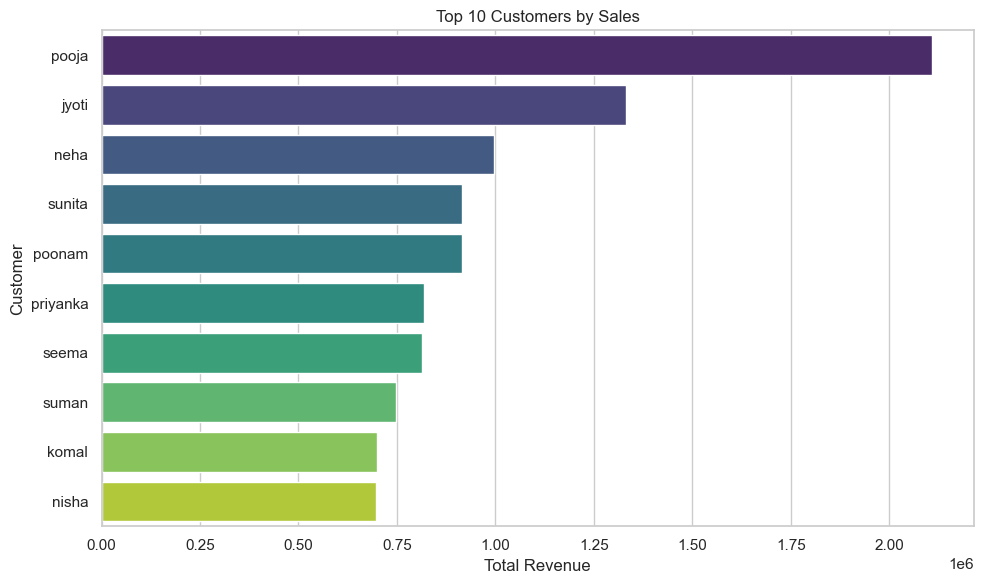

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_customers, x="total_price", y="cleaned_name", palette="viridis")
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Revenue")
plt.ylabel("Customer")
plt.tight_layout()
plt.show()


In [87]:
df.cleaned_name.value_counts(sort=False)

cleaned_name
priya            3819
harpreet kaur     199
sonam            2718
rekha bai         200
mamta devi        216
                 ... 
anarkali          100
yasoda            108
rita rani          92
smt kala           91
smt surbhi        110
Name: count, Length: 4502, dtype: int64